In [19]:
                                        # ML in Health 

# -*- coding: utf-8 -*-
"""
Created on Wed Feb  5 14:10:14 2025

@author: cheikh
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier




In [20]:
# Chargement la base de données depuis Kaggle
data_path = "/kaggle/input/kaggle-database/ML Health.xlsx"  

# Vérification que les données sont bien chargées
print(data.head())  # Affiche les 5 premières lignes pour valider l'importation

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


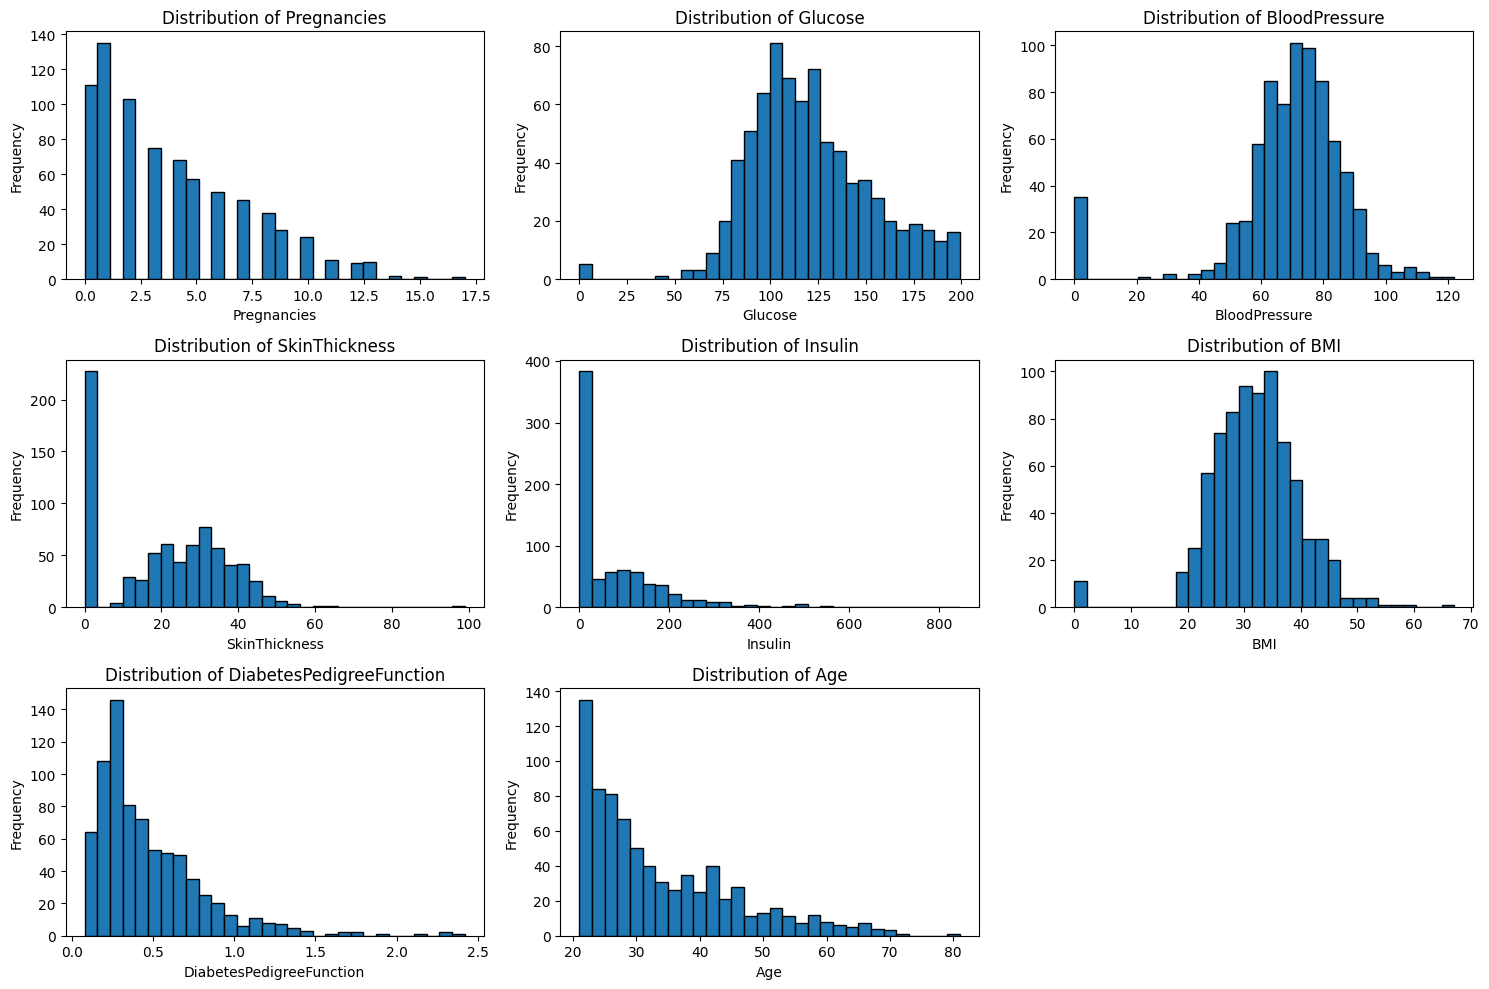

In [34]:
# Taille de la figure
plt.figure(figsize=(15, 10))

# Boucle pour créer des histogrammes pour chaque variable numérique
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i) 
    plt.hist(data[feature], bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)  
    plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()

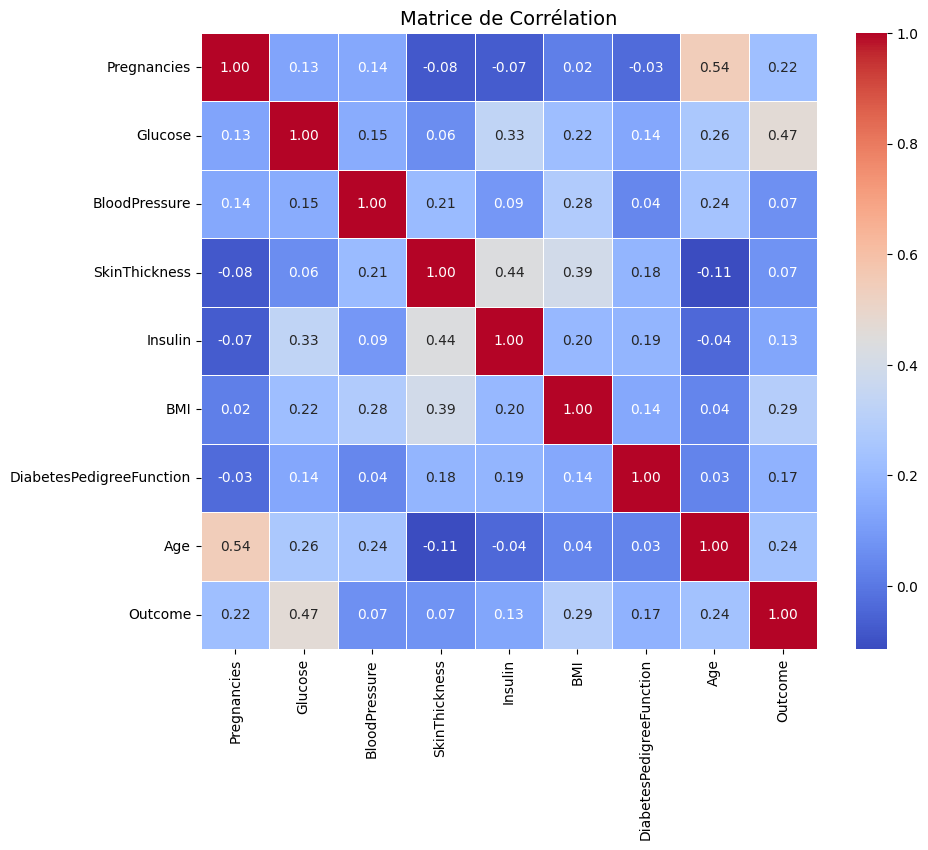

In [35]:
# Matrice de corrélation  

plt.figure(figsize=(10, 8)) # Taille de la figure

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar=True)

# Titre
plt.title('Matrice de Corrélation', fontsize=14)

# Afficher le graphique
plt.show()

La matrice de corrélation révèle plusieurs relations importantes entre les variables. Le glucose montre la plus forte corrélation positive avec l'outcome (0.47), ce qui en fait le meilleur prédicteur individuel du diabète. L'âge et le nombre de grossesses sont fortement corrélés entre eux (0.54), suggérant une relation naturelle entre ces variables. L'IMC présente une corrélation modérée avec l'outcome (0.29), tandis que l'épaisseur cutanée et l'insuline montrent une corrélation significative entre elles (0.44). La pression artérielle et la fonction pédigrée du diabète montrent des corrélations relativement faibles avec les autres variables, ce qui suggère qu'elles pourraient apporter des informations complémentaires uniques au modèle. 

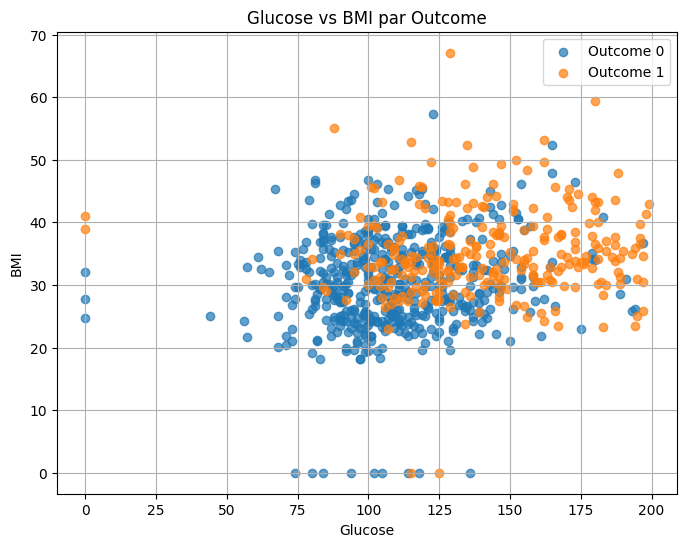

In [37]:
# Taille de la figure
plt.figure(figsize=(8, 6))

for outcome in [0, 1]:
    subset = data[data['Outcome'] == outcome]  # Filtrer les données selon Outcome
    plt.scatter(subset['Glucose'], subset['BMI'], label=f'Outcome {outcome}', alpha=0.7)

# Titres et Labels
plt.title('Glucose vs BMI par Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)  

# Afficher le graphique
plt.show()

Le nuage de points comparant le taux de glucose et l'IMC révèle une distinction intéressante entre les patients diabétiques (Outcome 1) et non diabétiques (Outcome 0). On observe une concentration plus élevée de cas diabétiques (points orange) dans la zone de glucose supérieure à 125 mg/dL, ce qui correspond au seuil clinique du diabète. La répartition de l'IMC est relativement similaire entre les deux groupes, majoritairement entre 20 et 45, mais les cas diabétiques semblent légèrement plus présents dans les IMC élevés. Quelques valeurs aberrantes sont visibles, notamment des IMC à 0 qui sont probablement des erreurs de données.

In [24]:
# Identification les colonnes pertinentes
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                    'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Prétraitement des données
X = data[numeric_features]
y = data[target]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Création du pipeline pour standardiser les données numériques
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Définir les pipelines pour différents modèles 
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Support Vector Machine': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}


In [30]:
# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Entraînement du modèle
        y_pred = model.predict(X_test)  # Prédiction sur l'ensemble de test
        
# Vérification des labels prédits
        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(classification_report(y_test, y_pred))
        print("\n")
    
    except Exception as e:
        print(f"Erreur avec le modèle {name}: {e}")

--- Logistic Regression ---
Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



--- Random Forest ---
Accuracy: 0.7208
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



--- Support Vector Machine ---
Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Dans cette analyse de modèles de machine learning pour prédire le diabète, la régression logistique se distingue avec la meilleure performance globale, atteignant 75,32% de précision dans la détection des cas de diabète. Les modèles montrent une capacité à différencier les patients diabétiques et non diabétiques, mais avec des variations de performance. La classe 0 (patients sans diabète) est systématiquement mieux prédite que la classe 1 (patients diabétiques), ce qui pourrait indiquer des difficultés à identifier précisément les cas de diabète.